In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [145]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

time_arr = [dt.time() for dt in 
       datetime_range(datetime(2016, 9, 1, 0), datetime(2016, 9, 2, 1), 
       timedelta(minutes=15))][1:-3]

In [146]:
def func2(x):
    for i in range(len(time_arr)):
        if x<=time_arr[i]:
            return i
    return None

In [154]:
import numpy as np

def q1(x):
    # print(x)
    return np.percentile(x, 25)

def q2(x):
    return np.percentile(x, 50)

def q3(x):
    return np.percentile(x, 75)


In [78]:
apc_df =  pd.read_parquet('./carta-apc.parquet/2021_10_24_gtfs_days', engine='pyarrow').sort_values(['transit_date', 'time_actual_arrive']).reset_index(drop=True)

In [111]:
#choose time of bus stop arrival for each day
apc_df['time_only'] = pd.to_datetime(apc_df['time_actual_arrive'],format= '%H:%M:%S' ).dt.time

In [144]:
# apc_df[['transit_date', 'time_actual_arrive', 'time_only', 'ons', 'offs', 'load']].head()

In [143]:
#choose only weekdays
apc_df = apc_df[apc_df.type_of_day == 'weekday'].reset_index()

In [147]:
# group by 15min intervals
apc_df2 = apc_df
# apc_df2['time_only'] = apc_df2['time_only'].astype(str)
apc_df2 = apc_df2.dropna(subset=['time_only'])
apc_df2['time_grp'] = apc_df2.time_only.apply(lambda x: func2(x))

c:\Users\senr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [195]:
len(apc_df2.dropna(subset=['time_only']).time_grp.unique())

84

### for ons

In [230]:
apc_df_grp = apc_df2.groupby('time_grp').agg(Count=("ons", 'count'),    
                  Sum=('ons','sum'),      
                  min=('ons', 'min'),  
                  max=('ons', 'max'),  
                  Q1= ('ons', q1), 
                  Q2= ('ons', np.median), 
                  Q3= ('ons', q3)).reset_index()

In [231]:
apc_df_grp.time_grp = apc_df_grp.time_grp.astype(int)

In [236]:
# apc_df_grp.set_index('time_grp').reset_index().drop(['time_grp', 'Count', 'Sum'], axis=1).T.boxplot(figsize=(20, 10), rot=90)

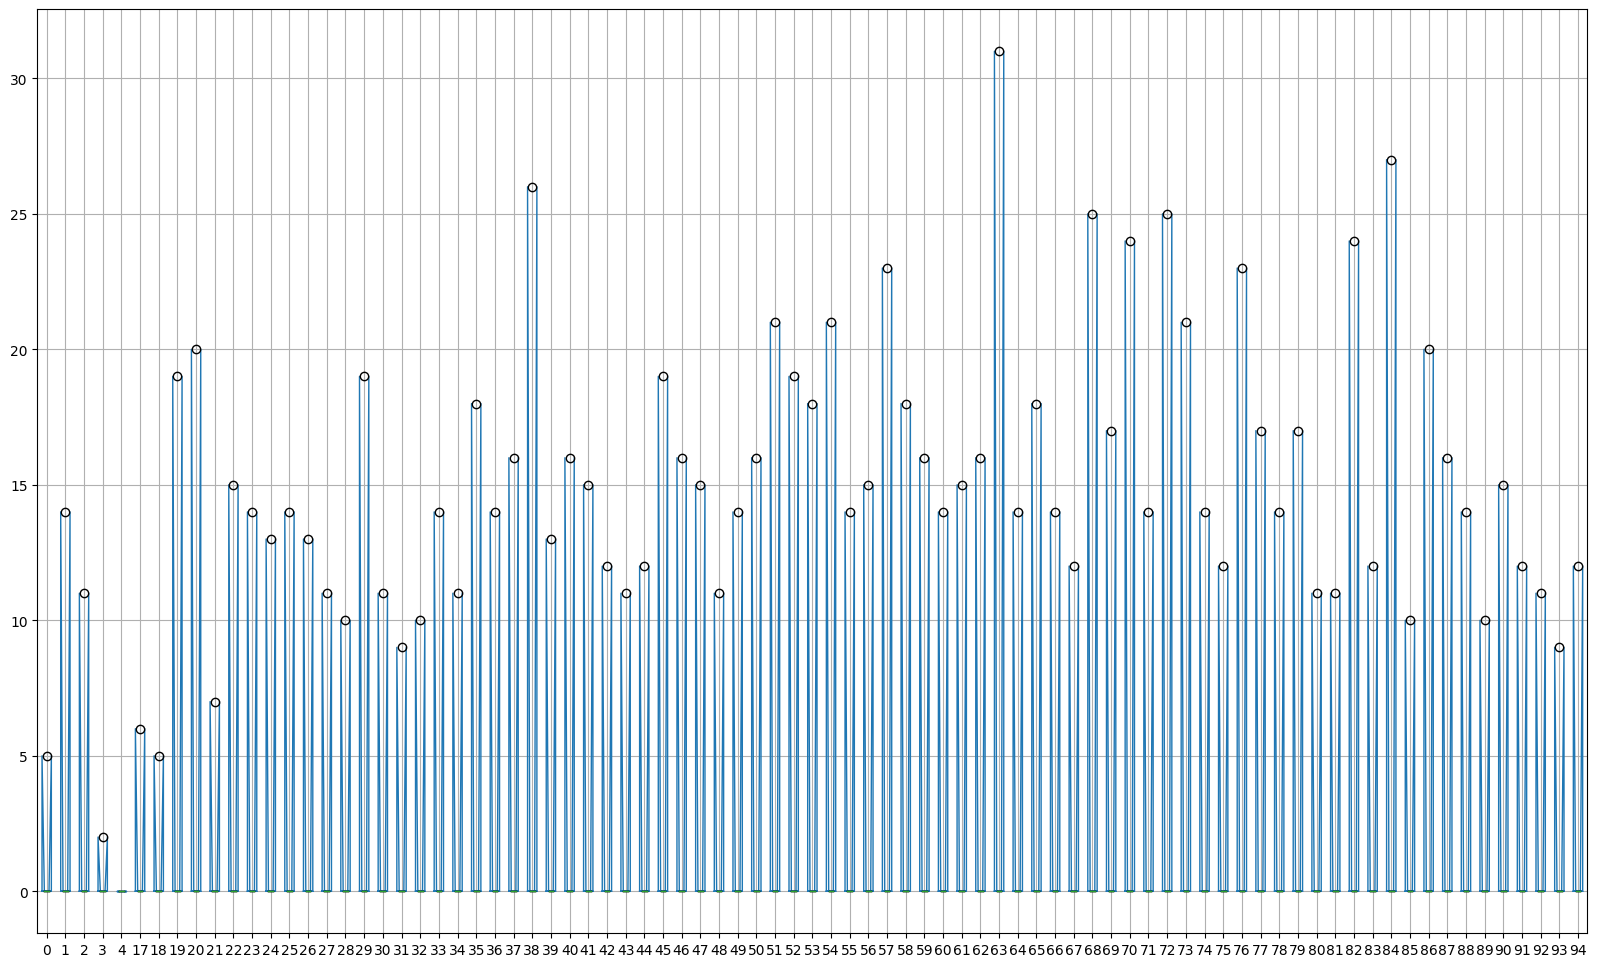

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots(figsize=(20, 12))
apc_df_grp.set_index('time_grp').drop(['Count', 'Sum'], axis=1).T.boxplot(ax=ax, notch=True, bootstrap=5000, figsize=(20, 12))
# ax.set_xticks(range(10))
# ax.set_xticklabels(range(10))
plt.show()

### for loads

In [ ]:
apc_df_grp = apc_df2.groupby('time_grp').agg(Count=("load", 'count'),    
                  Sum=('load','sum'),      
                  min=('load', 'min'),  
                  max=('load', 'max'),  
                  Q1= ('load', q1), 
                  Q2= ('load', np.median), 
                  Q3= ('load', q3)).reset_index()

In [ ]:
apc_df_grp.time_grp = apc_df_grp.time_grp.astype(int)

<AxesSubplot:>

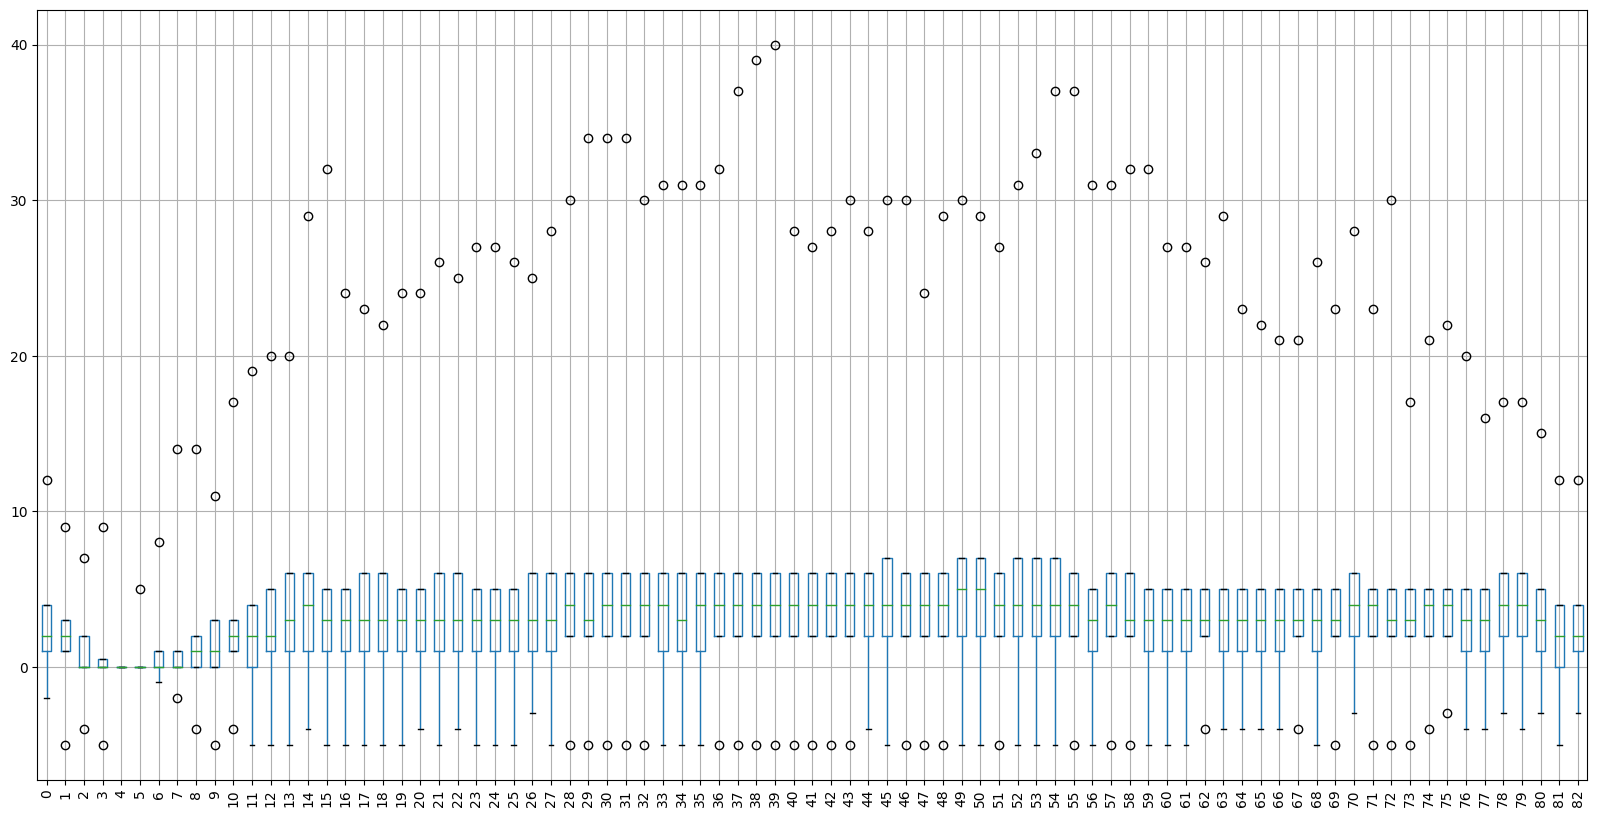

In [ ]:
apc_df_grp.set_index('time_grp').reset_index().drop(['time_grp', 'Count', 'Sum'], axis=1).T.boxplot(figsize=(20, 10), rot=90)

In [217]:
df = pd.DataFrame(np.random.randn(10, 2),
                  columns=['Col1', 'Col2'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                     'B', 'B', 'B', 'B', 'B'])
df
# .boxplot(by='X')

,Col1,Col2,X
0,-2.546877,-0.408473,A
1,-0.892446,2.116869,A
2,-2.022224,-0.780812,A
3,-0.424638,0.464414,A
4,-0.426239,3.165594,A
5,0.521168,0.264826,B
6,-1.716728,0.421280,B
7,1.267016,1.064129,B
8,-1.125285,0.972998,B
9,-0.854164,-1.400288,B


<AxesSubplot:title={'center':'ons'}, xlabel='[time_grp]'>

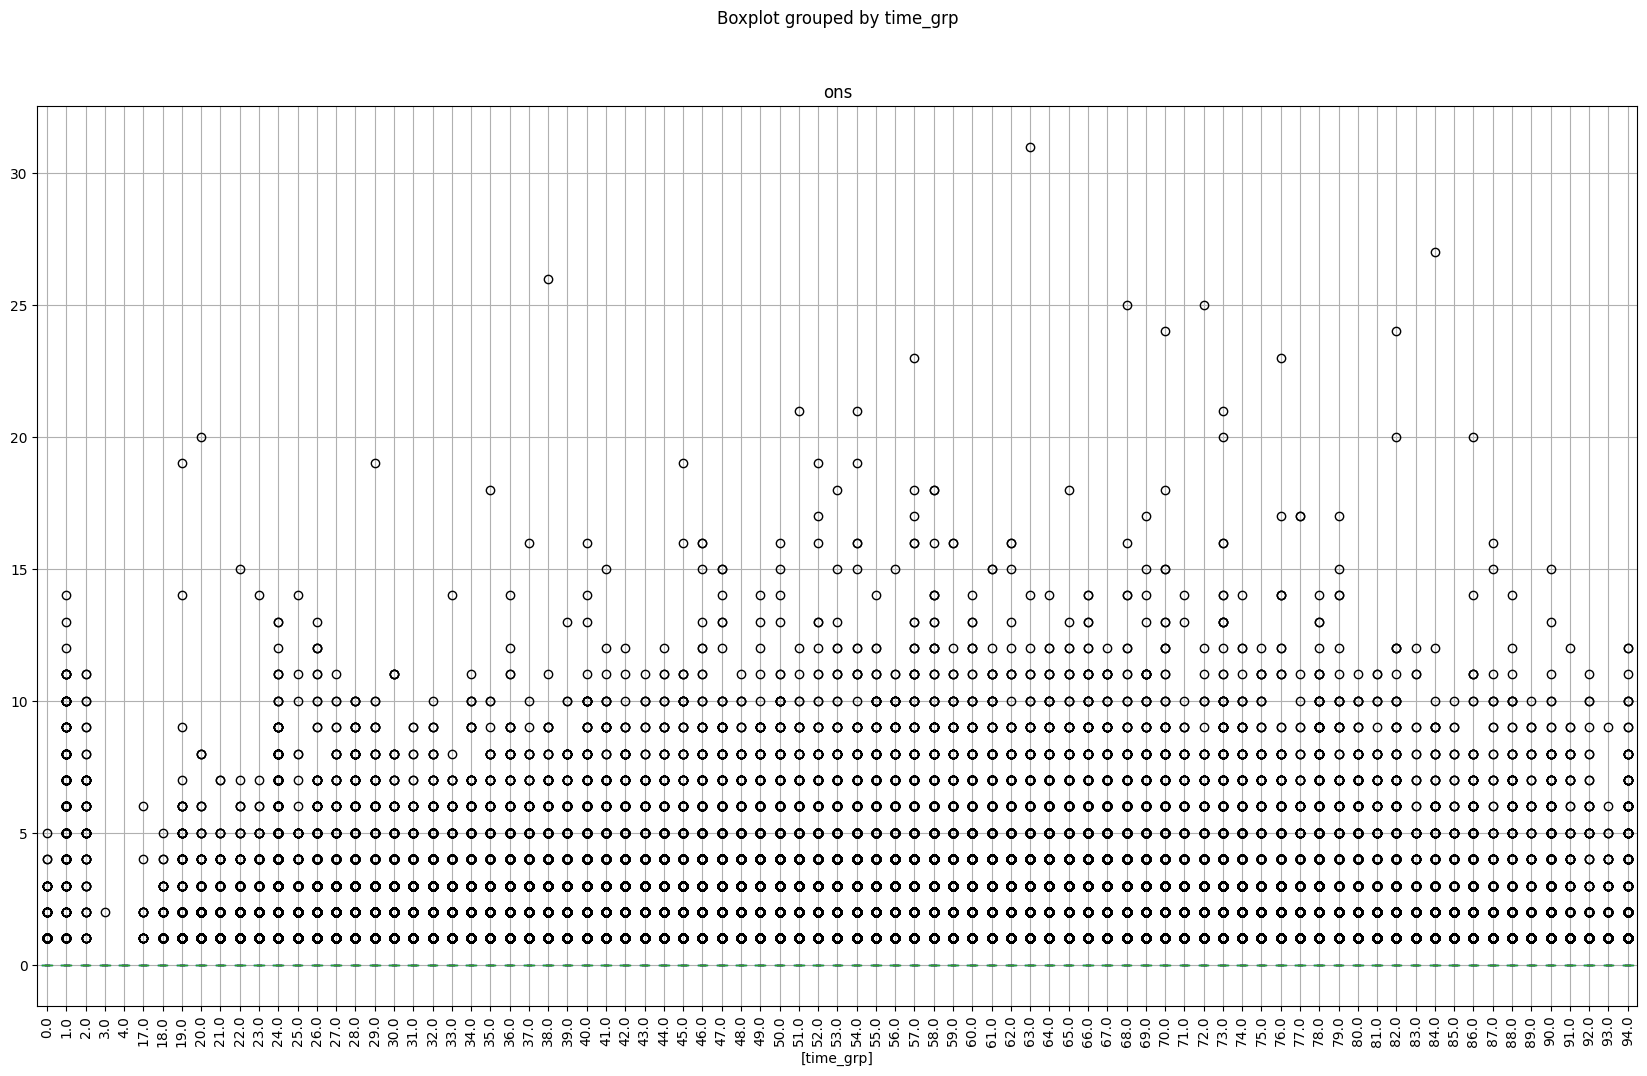

In [245]:
apc_df2[['time_grp', 'ons']].boxplot(by='time_grp', figsize=(20, 12), rot=90)

In [180]:
a2 = apc_df[apc_df.transit_date == '2022-01-11']
a2['time_only'] = pd.to_datetime(a2['time_actual_arrive'],format= '%H:%M:%S' ).dt.time
a2 = a2[a2.type_of_day == 'weekday'].reset_index()

a2 = a2.dropna(subset=['time_only'])
a2['time_grp'] = a2.time_only.apply(lambda x: func2(x))

a2_grp = a2.groupby('time_grp').agg(Count=("ons", 'count'),    
                  Sum=('ons','sum'),      
                  min=('ons', 'min'),  
                  max=('ons', 'max'),  
                  Q1= ('ons', q1), 
                  Q2= ('ons', np.median), 
                  Q3= ('ons', q3)).reset_index()

c:\Users\senr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
a2_grp.set_index('time_grp').reset_index().drop(['time_grp', 'Count', 'Sum'], axis=1)
# .boxplot(figsize=(20, 10))


,min,max,Q1,Q2,Q3
0,0,1,0.0,0.0,0.0
1,0,11,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0
3,0,2,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0
...,...,...,...,...,...
76,0,3,0.0,0.0,0.0
77,0,1,0.0,0.0,0.0
78,0,0,0.0,0.0,0.0
79,0,0,0.0,0.0,0.0


In [212]:
# apc_df2 = apc_df.dropna(subset=['ons'])
# apc_df2['time_only'] = apc_df2['time_only'].astype(str)
# apc_df2['time_only'] = apc_df2['time_only'].apply(pd.Timestamp)
# print(apc_df2)
# apc_df_idx = pd.DatetimeIndex(apc_df2.time_only.values)
# apc_df2 = apc_df2.set_index(apc_df_idx) 
# apc_df2.groupby(pd.Grouper(freq='15min', base=0, label='right')).agg(Count=("ons", 'count'),    
#                   Sum=('ons','sum'),      
#                   min=('ons', 'min'),  
#                   max=('ons', 'max'),  
#                   Q1= ('ons',percentile(25)), #This is for first quartile
#                   Q2= ('ons',percentile(50)), #2nd Quartile
#                   Q3= ('ons',percentile(75)))


# apc_df2.groupby(pd.Grouper(freq='15Min', offset=0, label='right')).agg(func={
    
#                   'Count':pd.NamedAgg(column='ons', aggfunc='count'),    
#                   'Sum':pd.NamedAgg(column='ons', aggfunc='sum'),      
#                   'min':pd.NamedAgg(column='ons', aggfunc='min'),  
#                   'max':pd.NamedAgg(column='ons', aggfunc='max'),  
#                   'Q1': pd.NamedAgg(column='ons', aggfunc=percentile(25)), 
#                   'Q2': pd.NamedAgg(column='ons', aggfunc=percentile(50)),
#                   'Q3': pd.NamedAgg(column='ons', aggfunc=percentile(75))}
#                   )